In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split 

### Data Preparation

In [289]:
#load the dataset
ratings_df = pd.read_csv('ratings_matrix.csv')
ratings_df.head()

,User_id,"""Chosen"" Classics: Round the World in Eighty Days","""D"" is for Deadbeat","""Mildred Pierce","""Ra Force Rising"": Brother G","""Thirty years in hell""; or, ""From darkness to light",'Tis The Season: The Choice\First Fruits\A New Year; A New Beginning,'Tis the Season to Be Murdered,... Summer moonshine,...Arrow pointing nowhere,...,Zane's Gettin' Buck Wild: Sex Chronicles II,Zane's Skyscraper: A Novel,Zazie dans le Mtro,Zen Attitude,Zia,Zorba the Greek,green valley,never too much,our davie pepper,the Picture of Dorian Gray
0,A106016KSI0YQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A106E1N0ZQ4D9W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A10T0OW97SFBB,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A10Y3OZWENAQ6W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1129LM24YWSZV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [290]:
#replace missing ratings with Nan
ratings_df.fillna(0, inplace=True)
#save user and title information
users = ratings_df['User_id']
all_titles = ratings_df.columns[1:]
#drop user column
ratings_df = ratings_df.drop('User_id', axis=1)
#transpose to item based matrix
ratings_df = ratings_df.T
ratings_df

,0,1,2,3,4,5,6,7,8,9,...,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
"""Chosen"" Classics: Round the World in Eighty Days",0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
"""D"" is for Deadbeat",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Mildred Pierce",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Ra Force Rising"": Brother G",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Thirty years in hell""; or, ""From darkness to light",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zorba the Greek,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
green valley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
never too much,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
our davie pepper,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [279]:
#train test split
train_df, test_df = train_test_split(ratings_df, test_size=0.1, random_state=1992)
print(f'Training Set Dimensions: {train_df.shape}') 
print(f'Test Set Dimensions: {test_df.shape}')

Training Set Dimensions: (1921, 1066)
Test Set Dimensions: (214, 1066)


In [272]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
Raspberry Crush,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Interpreter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
HELP MY MY MARRIAGE IS IN TROUBLE . I NEED A SECOND CHANCE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T. C. Boyle Stories,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Coldwater Revival: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Replay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Until the Real Thing Comes Along:,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
There Came a Stranger,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Better Than I Know Myself,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [273]:
#save train/test titles for inference later
train_titles = train_df.index
test_titles = test_df.index
#matrix to be passed to the autoencoder
train_matrix = train_df.to_numpy()
test_matrix = test_df.to_numpy()

In [274]:
train_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 4., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1921, 1066))

In [275]:
#fucntion to handle item based bias. Subtracts the mean of each item from ratings for that item
#Note this is a masked mean and is only subtracted from non-zero items
def subtract_biases(X):
    X_centered = X.copy()
    biases = []
    for i in range(X.shape[0]):
        row = X[i]
        nonzero_mask = row != 0
        #only do if non-zero entries in the row
        if np.any(nonzero_mask): 
            bias = row[nonzero_mask].mean() #calculate item mean
            biases.append(bias)
            X_centered[i, nonzero_mask] = row[nonzero_mask] - bias

    return X_centered, biases


In [ ]:
#get final train/test matrices after removing item means
train_matrix, train_biases = subtract_biases(train_matrix)

test_matrix, test_biases = subtract_biases(test_matrix)

### Training
#### Loss Function

In [32]:
#masked mse loss function(doen't count the loss for unrated items in original ratings)
def masked_mse(y_true, y_pred):
    #get indices where there are no ratings
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    #get difference between true and predicted values
    squared_error = tf.square(y_true - y_pred)
    #keep only rated items
    masked_se = mask * squared_error
    #average over non-zero entries
    return tf.reduce_sum(masked_se) / tf.reduce_sum(mask)

#### Autoencoder Architecture
Used these papers and keras tutorial for ideas,<br><br>
AutoRec: Autoencoders Meet Collaborative Filtering:<br>
<Link Text>https://users.cecs.anu.edu.au/~akmenon/papers/autorec/autorec-paper.pdf<br><br>
Training Deep AutoEncoders for Collaborative Filtering:<br>
<Link Text>https://arxiv.org/pdf/1708.01715<br><br>
Keras Autoencoder Tutorial:<br>
<Link Text>https://blog.keras.io/building-autoencoders-in-keras.html


In [253]:
original_dim = train_matrix.shape[1]
encoding_dim = 512

#input layer: user rating vector
input_layer = layers.Input(shape=(original_dim,))

#encoded layer
encoded = layers.Dense(encoding_dim, activation='selu', kernel_regularizer=regularizers.l2(0.00001), 
                       activity_regularizer=regularizers.l1(0.00001))(input_layer)

#decoder
output_layer = layers.Dense(original_dim, activation='linear')(encoded) 

#model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

#compile the model
autoencoder.compile(optimizer='adam', loss= masked_mse)

In [254]:
autoencoder.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 1066)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 512)            │       546,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1066)           │       546,858 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,093,162 (4.17 MB)

 Trainable params: 1,093,162 (4.17 MB)

 Non-trainable params: 0 (0.00 B)

In [255]:
#train the model with early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = autoencoder.fit(train_matrix, train_matrix, epochs=500, batch_size=128, shuffle=True,
                          validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.9089 - val_loss: 0.6974
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4769 - val_loss: 0.5175
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2812 - val_loss: 0.4190
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1962 - val_loss: 0.3662
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1563 - val_loss: 0.3383
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1372 - val_loss: 0.3226
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1254 - val_loss: 0.3118
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1202 - val_loss: 0.3035
Epoch 9/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1143 - val_loss: 0.2967
Epoch 10/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1090 - val_loss: 0.2908
Epoch 11/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1067 - val_loss: 0.2859
Epoch 12/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

#### Plot the training/validation loss curves

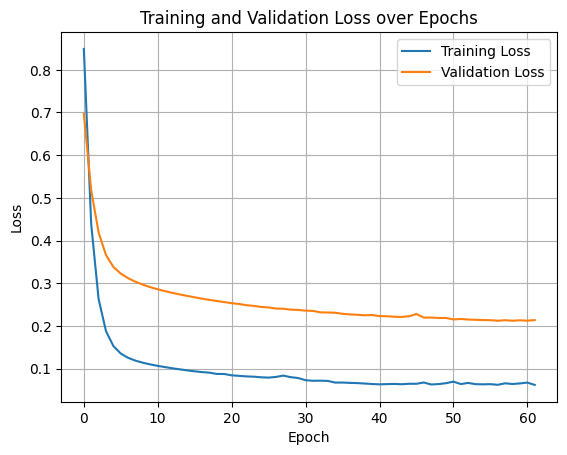

In [256]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### Save Model

In [ ]:
autoencoder.save('final_model.keras')

#### Check the test loss

In [259]:
#loss without regularization penalty
test_reconstruction = autoencoder.predict(test_matrix)
pred_test_tensor = tf.convert_to_tensor(test_reconstruction, dtype=tf.float32)

true_test_tensor = tf.convert_to_tensor(test_matrix, dtype=tf.float32)

test_loss = masked_mse(true_test_tensor,pred_test_tensor)

print(f'Test Loss: {test_loss.numpy():.4f}')
print(f'+/- {np.sqrt(test_loss):.4f} from true rating')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Test Loss: 0.1511
+/- 0.3888 from true rating


In [260]:
#loss with regularization penalty
autoencoder.evaluate(true_test_tensor, true_test_tensor, batch_size=None)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1786 


0.16609030961990356

### Inference

In [261]:
reconstruction_matrix = autoencoder.predict(train_matrix)
#add biases, transpose to user based
reconstruction_matrix = (reconstruction_matrix + np.array([train_biases]).T)
#transpose to make user based matrix again
reconstruction_matrix = reconstruction_matrix.T

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [262]:
print(reconstruction_matrix.shape)
print(reconstruction_matrix[0:5,:])
print(f'range of reconstructed ratings: {reconstruction_matrix.min()} - {reconstruction_matrix.max()}')

(1066, 1921)
[[3.67260097 4.18506416 4.27053335 ... 4.09298703 4.32303743 4.64469472]
 [3.88957777 4.40494819 4.37506243 ... 3.97347481 4.30322853 4.39955614]
 [3.7867601  4.51488155 4.41468049 ... 4.19227069 4.35093243 4.18008782]
 [3.69374057 4.20122319 4.26453354 ... 3.93869045 4.21561928 4.0697259 ]
 [3.79477224 4.47428189 4.26345355 ... 4.0937604  4.15558975 4.20758976]]
range of reconstructed ratings: -1.8184062305249666 - 7.15035521356683


#### Make recommendations For Random User

In [282]:

#number of items to recommend
top_k = 10
#zero out previously rated items, so they are not recommended
#rated_indices = np.argwhere(test_matrix)
#rows, columns = rated_indices.T
#reconstruction_matrix[rows,columns] = 0


#get random user
rand_num = np.random.randint(reconstruction_matrix.shape[0],size=1)
user = reconstruction_matrix[rand_num,:]
#make recommendations
recs = np.argsort(-user)[0,0:top_k]
print(rand_num)
print(recs)
print(train_titles[recs])
print(f'\npredicted ratings: {user[0,recs]}')

[252]
[1050 1673  831  636  223  512 1910  506  678  641]
Index(['1939 the Last Season of Peace', 'Pride and Prejudice', 'Ashworth Hall',
       'What's Wrong with Dorfman? A Novel', 'Omega', 'AND IT WAS SO',
       'The Didymus Contingency', 'Cat's Cradle',
       'Deep Is the Night Trilogy: Dark Fire', 'My Way Or No Way'],
      dtype='object')

predicted ratings: [5.07627556 5.04562688 4.99039963 4.9842113  4.98059076 4.97471297
 4.97471297 4.97471297 4.97471297 4.97471297]


#### Find items with highest predicted ratings

In [267]:
top_k=10
average_scores = reconstruction_matrix.mean(axis=0)
recs = np.argsort(-average_scores)[0:top_k]
print(f'Recommended Items: {recs}')
print(f'Predicted Ratings: {average_scores[recs]}')

book_recs = train_titles[recs]
print(f'Recommended Items: {book_recs}')

Recommended Items: [1910 1907  433   78  506 1242  450 1729  655  641]
Predicted Ratings: [4.99434601 4.99434601 4.99434601 4.99434601 4.99434601 4.99434601
 4.99434601 4.99434601 4.99434601 4.99434601]
Recommended Items: Index(['The Didymus Contingency', 'A Penknife in My Heart', 'Peek-a-boo!',
       'Alexandros. El Confin Del Mundo', 'Cat's Cradle',
       'Absolutely Rotten Jokes', 'My Brother's Keeper',
       'The Essence of Innocence... Undeniable Betrayal... Unforgiven Love',
       'THRESHOLD', 'My Way Or No Way'],
      dtype='object')


#### Predictions for user 2

In [293]:
top_k = 20

#get originally rated books
user = ratings_df.iloc[:,2]
#books rated 4 or more by user
mask = user >= 4
rated_books = all_titles[mask]
print(rated_books)


#get recommendations
user = reconstruction_matrix[[2],:]
#make recommendations
recs = np.argsort(-user)[0,0:top_k]
print(rand_num)
print(recs)
print(train_titles[recs])
print(f'\npredicted ratings: {user[0,recs]}')



Index(['"Chosen" Classics: Round the World in Eighty Days',
       'AT THE FOOT OF THE RAINBOW',
       'Alice's adventures in wonderland: And Through the looking-glass, and what Alice found there,',
       'Brave New World', 'Cape Breton Road: A Novel',
       'Captain from Castile & Prince of Foxes', 'Fair Exchange Is Robbery',
       'For Those Who Fell', 'I have no mouth,: And I must scream;',
       'Instigating Profligacy: Aviva and Aisha's Adventures in the World',
       'Japan Eow2', 'Just Sex', 'Kim',
       'LEWIS CARROLL (ALICE'S ADVENTURES IN WONDERLAND, THROUGH THE LOOKING GLASS, THE HUNTING OF THE SNARK',
       'Lion, the Witch, and the Wardrobe', 'Lord of Flemen',
       'Man Who Was Thursday a Nightmare', 'Memories of the Future; [Novel]',
       'Miranda & the Cat', 'New Orleans Beat', 'Plague at Redhook',
       'Pride and Prejudice',
       'THE PETAYBEE SEQUENCE: Book One: Powers that Be; Book Two: Power Lines; Book Three: Power Play',
       'The Fox's Walk', 'Th